# Library Acquision Simulation

In [1]:
import random
import numpy as np
import pandas as pd

In [2]:
## This is getting thickness of books.
def get_thickness(num_of_titles):
    thickness_list = []
    for i in range(num_of_titles):
        thickness = round(random.uniform(0.1, 20), 2)
        thickness_list.append(thickness)
    # print("This is the random thickness:", thickness_list)

    return thickness_list
get_thickness(10)

[18.44, 16.8, 6.15, 17.66, 14.1, 11.31, 3.27, 17.13, 5.13, 16.88]

In [3]:
## This is getting price of books.
def get_price(num_of_titles):
    thickness = get_thickness(num_of_titles)
    print(thickness)
    price_list = []
    for i in thickness:
        price1 = round(random.uniform(1, 50), 2)
        price2 = round(random.uniform(50, 100), 2)
        price3 = round(random.uniform(100, 200), 2)
        if i <= 5:
            price_list.append(price1)
        elif 5 < i <= 10:
            price_list.append(price2)
        elif i > 10:
            price_list.append(price3)
    return price_list
get_price(10)

[16.1, 5.55, 19.69, 9.27, 19.15, 10.03, 4.48, 3.38, 19.54, 17.39]


[122.2, 66.73, 183.53, 88.94, 132.24, 125.61, 21.73, 11.22, 126.83, 107.44]

In [4]:
## combine the two functions and return DataFrame.
def get_attribute(num_of_titles):
    '''
    This is getting attributes of books, thickness and prices. The price will caculate randomly depedning on its thickness.
    :param num_of_titles: Integer. a number of titles a librarian would like to purchase.
    :return: DataFrame, columns are thickness and price.
    '''
    thickness_list = []
    for i in range(num_of_titles):
        thickness = round(random.uniform(0.1, 20), 2)
        thickness_list.append(thickness)
    # print("This is the random thickness:", thickness_list)
    price_list = []
    for i in thickness_list:
        price1 = round(random.uniform(1, 50), 2)
        price2 = round(random.uniform(50, 100), 2)
        price3 = round(random.uniform(100, 200), 2)
        if i <= 5:
            price_list.append(price1)
        elif 5 < i <= 10:
            price_list.append(price2)
        elif i > 10:
            price_list.append(price3)
    # print("This is the random price", price_list)
    df = pd.DataFrame(data={'Thickness': thickness_list,
                            'Price': price_list})
#     print("This is the random book\n", df)
    return df
get_attribute(10)

,Thickness,Price
0,8.79,68.81
1,18.46,100.33
2,0.78,15.41
3,3.19,13.23
4,1.01,37.24
5,8.21,59.52
6,13.41,155.59
7,12.24,196.73
8,4.72,33.87
9,1.72,7.38


In [5]:
# Since page numbers and its thickness are impact on thickness and we add pages numbers as another variables.
def get_attributes(num_of_titles):
    '''
    This is getting attributes of books, thickness and prices. The price will caculate randomly depedning on its thickness.
    :param num_of_titles: Integer. a number of titles a librarian would like to purchase.
    :return: DataFrame, columns are thickness and price.
    '''
    pages_list = []
    for i in range(num_of_titles):
        page = round(random.randint(10, 2000), 2)
        pages_list.append(page)
    print("This is the random pages:", pages_list)
    thickness_list = []
    for i in pages_list:
        page_thickness = random.uniform(0.01, 0.05) # thickness range per each paper
        thickness = page_thickness * i
        thickness_list.append(thickness)
    # print("thickness_list", thickness_list)
    price_list = []
    for i in pages_list:
        price1 = round(random.uniform(1, 40), 2)
        price2 = round(random.uniform(40, 100), 2)
        price3 = round(random.uniform(100, 200), 2)
        if i <= 100:
            # price1 = round(random.uniform(1, 40), 2)
            price_list.append(price1)
        elif 100 < i <= 400:
            price_list.append(price2)
        elif i > 400:
            price_list.append(price3)
    # print("This is the random price", price_list)
    df = pd.DataFrame(data={'Thickness': thickness_list,
                            'Price': price_list})
    # print("This is the random book\n", df)
    return df

get_attributes(10)

This is the random pages: [1299, 1757, 552, 213, 977, 1404, 1463, 754, 1841, 1919]


,Thickness,Price
0,53.551923,162.65
1,55.028450,181.41
2,13.085796,198.04
3,3.250641,99.94
4,33.285062,129.36
5,47.244311,151.92
6,29.548689,157.82
7,26.144711,139.40
8,70.993067,120.28
9,92.712572,103.16


In [6]:
# vendor discount. We created discount percentage depending on a number of books that a library would like to purchase.
def vendor_discount(num_of_titles):
    '''
    Discount percentage vendor will offer.
    :param num_of_titles: Integer. A number of titles a librarian would like to purchase from a vendor
    :return: float.
    >>> vendor_discount(50)
    0.01
    >>> vendor_discount(280)
    0.02
    '''
    if num_of_titles < 100:
        return 0.01
    elif 100 <= num_of_titles < 500:
        return 0.02
    elif num_of_titles >= 500:
        return 0.05

In [7]:
# drop books when price is excceed budget.
def price_solution(plan):
    '''
    A function for drop books from a list because of limited budget.
    :param plan: Data Frame. A book list with thickness and price
    :return: Data Frame excluding the book whose cost is the highest from the plan.
    '''
    drop = plan['Price'].max()
    print(drop)
    new_plan = plan.loc[plan['Price'] != drop]
    print('This is the new book plan:\n', new_plan)
    return new_plan
plan = get_attributes(10)
price_solution(plan)

This is the random pages: [1608, 387, 1615, 1297, 933, 1396, 787, 476, 360, 847]
199.78
This is the new book plan:
    Thickness   Price
0  37.157311  109.66
1  11.736152   92.26
2  73.031579  103.34
3  31.622173  186.29
4  26.926301  182.30
5  68.503402  160.55
6  23.358723  196.91
8  11.169485   89.02
9  34.463105  100.06


,Thickness,Price
0,37.157311,109.66
1,11.736152,92.26
2,73.031579,103.34
3,31.622173,186.29
4,26.926301,182.30
5,68.503402,160.55
6,23.358723,196.91
8,11.169485,89.02
9,34.463105,100.06


In [8]:
# drop books when space is not enough for new books.
def space_solution(plan):
    '''
    A function for dropping books from a list because of limited space
    :param plan: Data Frame. A book list with thickness and price
    :return: Data Frame, excluding the book whose space is the largest from the plan.
    '''
    drop = plan['Thickness'].max()
    # print(drop)
    new_plan = plan.loc[plan['Thickness'] != drop]
    print('This is the new book plan:\n', new_plan)
    return new_plan

In [9]:
# Monte Carlo Simulation for Acquisitions.
def MonteCarloSimulation(budget, space, num_of_titles, simulation):
    final_num_books = []
    final_prices = []
    final_space = []
    for i in range(simulation):
        plan = get_attributes(num_of_titles)

        total_price = plan['Price'].sum() * (1 - vendor_discount(num_of_titles))
        total_space = plan['Thickness'].sum()
        # print("This is the total price", total_price, type(total_price), type(plan['Price'].sum()), type(vendor_discount(num_of_titles)))
        # print("This is the total space", total_space, type(total_space))
        if total_price <= budget:
            if total_space <= space:
                print('The plan is fine:')
                # plan = plan

            elif total_space > space:
                print("The budget is enough, but we don't have enough space.\nThe new plan is:")
                while total_space > space:
                    plan = space_solution(plan)
                    total_space = plan['Thickness'].sum()

        elif total_price > budget:
            print("The budget is not enough.\nWe need a new plan.")
            while total_price > budget:
                plan = price_solution(plan)
                total_price = plan['Price'].sum() * (1 - vendor_discount(num_of_titles))

            if total_space <= space:
                print("The new plan is:")

            elif total_space > space:
                print("The new plan has no enough space.\nChange it.")
                while total_space > space:
                    plan = space_solution(plan)
                    total_space = plan['Thickness'].sum()
        total_num_book = len(plan.index)
        final_num_books.append(total_num_book)
        final_price = plan['Price'].sum()
        # final_space = total_space
        final_prices.append(final_price)
        final_space.append(total_space)
    final_plan = pd.DataFrame({'total_books': final_num_books, 'final_price': final_prices, 'final_space': final_space})


    return final_plan
MonteCarloSimulation(10000, 1000, 25, 5)

This is the random pages: [255, 1612, 741, 368, 775, 451, 1324, 286, 1013, 647, 896, 1469, 845, 81, 1728, 39, 1690, 510, 1625, 1001, 1913, 468, 741, 1848, 1027]
The plan is fine:
This is the random pages: [557, 1872, 1259, 1686, 1704, 1803, 999, 1164, 1264, 643, 611, 1874, 157, 1472, 111, 1652, 1915, 1555, 82, 1621, 1286, 1330, 447, 326, 1698]
The plan is fine:
This is the random pages: [1737, 1688, 1365, 940, 1409, 992, 343, 1905, 111, 1742, 793, 588, 983, 1604, 1649, 394, 1992, 1617, 1748, 784, 1395, 470, 1052, 1740, 1515]
The plan is fine:
This is the random pages: [319, 650, 306, 1738, 1047, 1815, 1937, 861, 1023, 1572, 810, 891, 1582, 1226, 151, 1622, 602, 493, 1614, 1327, 1175, 486, 1845, 1089, 1955]
The plan is fine:
This is the random pages: [1619, 1624, 1520, 1211, 370, 1736, 86, 997, 392, 299, 576, 1045, 115, 1898, 1948, 588, 1426, 298, 1391, 479, 1385, 1194, 932, 620, 1339]
The plan is fine:


,total_books,final_price,final_space
0,25,3461.06,641.707844
1,25,3349.77,862.157228
2,25,3440.53,934.228341
3,25,3543.14,883.044384
4,25,3342.90,729.064267


In [10]:
if __name__ == '__main__':
    total_books = []
    mean_prices = []
    mean_spaces = []
    for i in range(30):
        data = MonteCarloSimulation(10000, 40000, 20, 5)
        # data.append(data)
        total_book = data['total_books'].mean()
        total_books.append(total_book)
        mean_price = data['final_price'].mean()
        mean_prices.append(mean_price)
        mean_space = data['final_space'].mean()
        mean_spaces.append(mean_space)
        simulation = pd.DataFrame({'total_purchase_book': total_books, 'app_price': mean_prices, 'app_space': mean_spaces})


This is the random pages: [359, 1530, 881, 1988, 1276, 845, 44, 1737, 1690, 665, 720, 832, 445, 917, 764, 1758, 342, 1423, 1391, 171]
The plan is fine:
This is the random pages: [1687, 1417, 563, 1239, 795, 700, 1150, 1256, 867, 1131, 176, 211, 1263, 295, 1630, 19, 1572, 1441, 1545, 1567]
The plan is fine:
This is the random pages: [1965, 712, 1558, 174, 1491, 1939, 1609, 974, 522, 172, 1204, 838, 185, 511, 734, 1840, 1637, 1945, 1375, 1604]
The plan is fine:
This is the random pages: [1147, 737, 1629, 1986, 1830, 1750, 912, 513, 197, 130, 1553, 204, 477, 1825, 314, 1797, 1257, 1860, 455, 937]
The plan is fine:
This is the random pages: [1507, 1674, 100, 31, 211, 1834, 258, 1728, 151, 1663, 572, 518, 464, 1794, 1412, 1826, 189, 1764, 1503, 1938]
The plan is fine:
This is the random pages: [1169, 1540, 1608, 1758, 79, 968, 1424, 1947, 1709, 625, 236, 1352, 1242, 325, 705, 1128, 521, 1467, 880, 1043]
The plan is fine:
This is the random pages: [1644, 1663, 406, 738, 535, 1783, 882, 1065,

The plan is fine:
This is the random pages: [802, 234, 1301, 1915, 1596, 146, 157, 1434, 1663, 1036, 1344, 922, 13, 1768, 422, 1202, 1922, 425, 64, 350]
The plan is fine:
This is the random pages: [1352, 1798, 1754, 1856, 1145, 1360, 955, 492, 1674, 743, 1255, 1257, 393, 743, 379, 1766, 1189, 625, 1902, 229]
The plan is fine:
This is the random pages: [1979, 1377, 1886, 1659, 1738, 258, 1654, 1804, 1864, 1899, 17, 1656, 421, 705, 251, 1718, 1054, 693, 719, 1704]
The plan is fine:
This is the random pages: [837, 1116, 1472, 1550, 396, 1618, 1117, 1105, 404, 1869, 107, 1354, 42, 743, 876, 1535, 1464, 1375, 1086, 1987]
The plan is fine:
This is the random pages: [1737, 1934, 63, 1865, 581, 269, 52, 164, 1589, 565, 565, 1424, 1032, 1168, 293, 1563, 1817, 950, 1079, 101]
The plan is fine:
This is the random pages: [483, 1353, 730, 463, 1673, 159, 717, 522, 1063, 267, 1110, 1755, 1470, 1219, 1444, 1938, 1876, 125, 701, 1747]
The plan is fine:
This is the random pages: [62, 306, 1260, 542, 16

In [11]:
simulation

,total_purchase_book,app_price,app_space
0,20.0,2640.652,684.951758
1,20.0,2594.278,545.467089
2,20.0,2599.336,715.418954
3,20.0,2639.666,601.583569
4,20.0,2615.288,580.911693
5,20.0,2596.116,625.522053
6,20.0,2686.648,687.101229
7,20.0,2546.132,629.771981
8,20.0,2764.638,642.963983
9,20.0,2617.176,580.597267


No handles with labels found to put in legend.


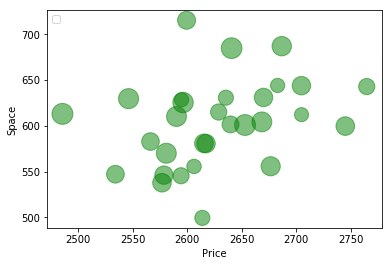

In [21]:
import matplotlib.pyplot as plt
import numpy as np


x = simulation['app_price']
y = simulation['app_space']
s = np.random.rand(*x.shape) * 1000 + 800

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'.',
            label="")
plt.xlabel("Price")
plt.ylabel("Space")
plt.legend(loc='upper left')
plt.show()